# 푸코 인용 논문 분석

In [12]:
import pandas as pd
import ast
# matplotlib 폰트설정
import matplotlib.pyplot as plt
# https://github.com/killiansheriff/LovelyPlots
# plt.style.use(['ipynb','use_mathtext','colors5-light'])
# plt.rc('font', family='NanumGothic')
# print(plt.rcParams['font.family'])
plt.rcParams["figure.dpi"] = 240 # DPI 고화질로 향상

from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multitest import multipletests
import scipy.stats

### 1. 어떤 푸코의 저작이 인용되었나?

In [2]:
df = pd.read_pickle('./231005_2008_2021_df.pkl') # 한국현대문학 논문 서지정보
ref_df = pd.read_pickle('./231005_2008_2021_ref_df.pkl') # 한국현대문학 논문 참고문헌
ref_fu = pd.read_pickle('./231005_2008_2021_ref_fu.pkl') # 푸코 인용 논문 참고문헌

<Axes: xlabel='year'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

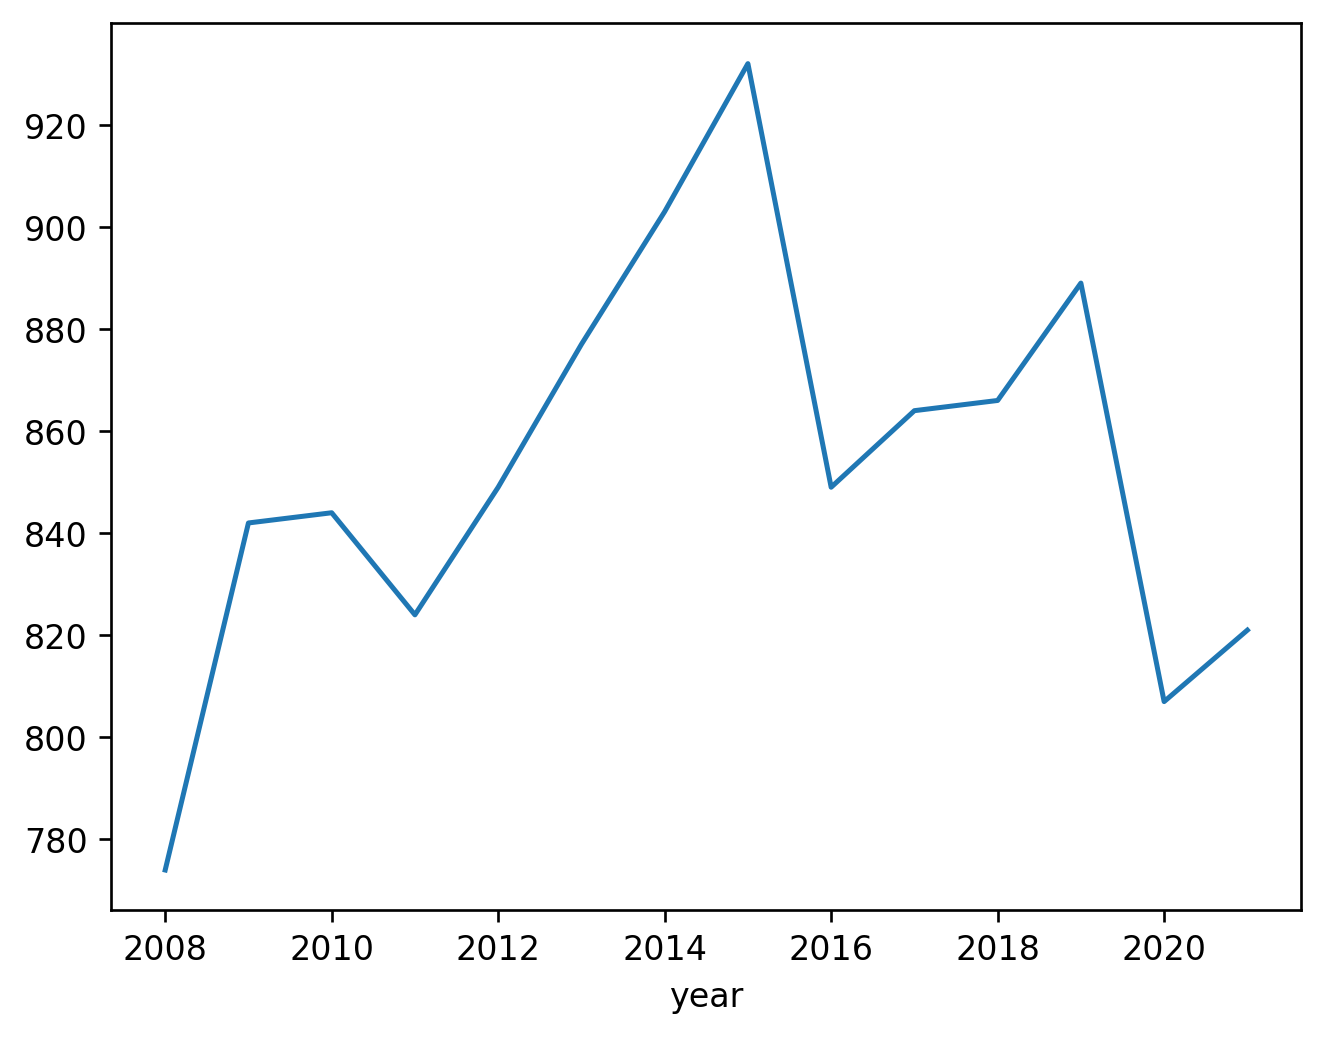

In [7]:
# 전체 분석 대상 논문 게재 추이
df['year'].value_counts().sort_index().plot()

year
2008    40
2009    42
2010    54
2011    41
2012    51
2013    51
2014    65
2015    74
2016    62
2017    65
2018    61
2019    81
2020    56
2021    83
Name: count, dtype: int64


<Axes: xlabel='year'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

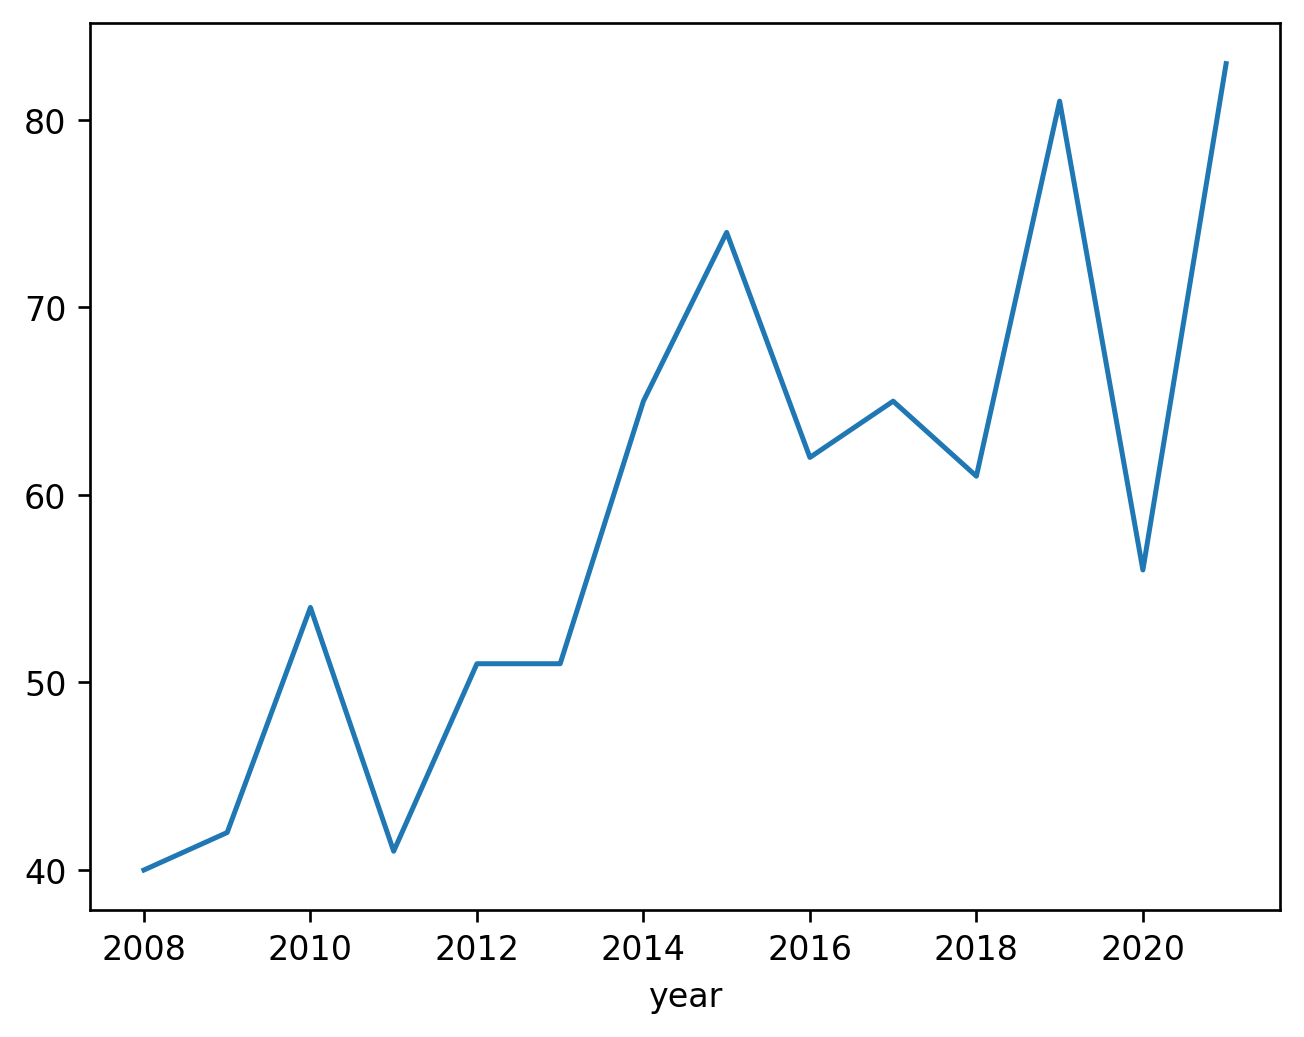

In [8]:
# 푸코 인용 추이
print(ref_fu['year'].value_counts().sort_index())
ref_fu['year'].value_counts().sort_index().plot()

In [9]:
ref_fu['classification'].value_counts(normalize=True)

classification
2.0    0.498789
1.0    0.359564
3.0    0.100484
4.0    0.041162
Name: proportion, dtype: float64

In [5]:
# pd.DataFrame(ref_fu['uri'].value_counts()).reset_index().to_excel('./stats/푸코저작_인용.xlsx')

In [10]:
pd.crosstab(ref_fu['classification'],ref_fu['year'],normalize='columns')

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
classification,,,,,,,,,,,,,,
1.0,0.425,0.357143,0.166667,0.365854,0.254902,0.333333,0.230769,0.432432,0.306452,0.276923,0.459016,0.419753,0.535714,0.421687
2.0,0.475,0.452381,0.648148,0.463415,0.568627,0.470588,0.661538,0.418919,0.580645,0.538462,0.459016,0.456790,0.321429,0.469880
3.0,0.075,0.142857,0.111111,0.097561,0.137255,0.137255,0.061538,0.054054,0.112903,0.107692,0.081967,0.098765,0.107143,0.108434
4.0,0.025,0.047619,0.074074,0.073171,0.039216,0.058824,0.046154,0.094595,0.000000,0.076923,0.000000,0.024691,0.035714,0.000000


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

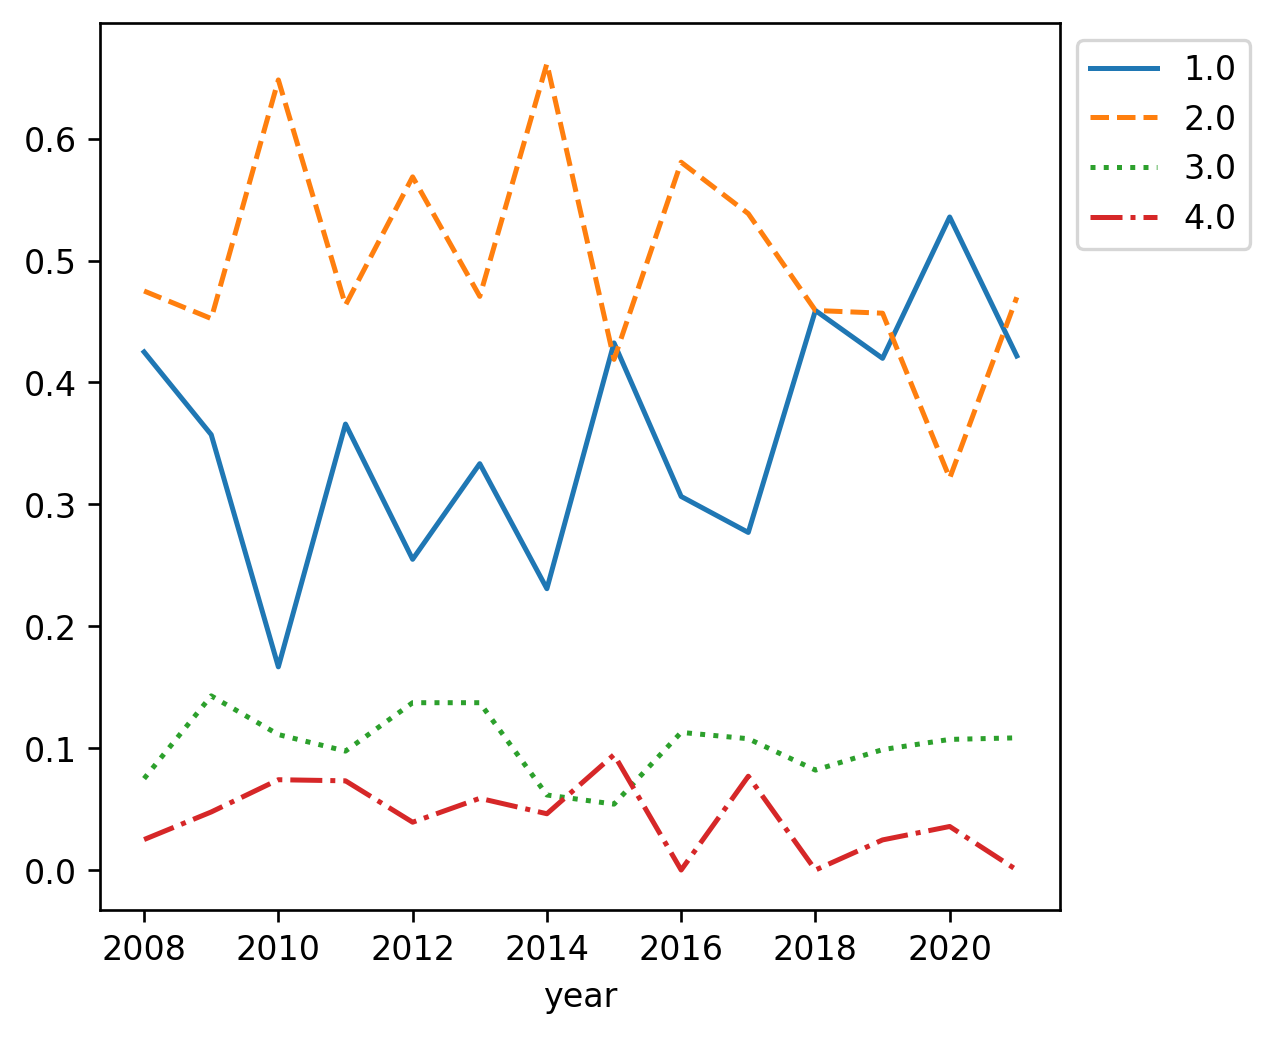

In [14]:
pd.crosstab(ref_fu['classification'],ref_fu['year'],normalize='columns').T.plot(style=['-', '--', ':', '-.'])
# 범례 위치 설정: 플롯의 오른쪽 바깥쪽
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 축 조정 (범례에 의해 가려지는 부분 방지)
plt.subplots_adjust(right=0.75)

In [42]:
# 연도별 주요 저작 인용 패턴
pd.crosstab(ref_fu['uri'],ref_fu['year'],margins=True).to_excel('./stats/연도별_푸코저작_인용.xlsx')

In [43]:
# 성별 주요 저작 인용 패턴
pd.crosstab(ref_fu['uri'],ref_fu['gender'],margins=True).to_excel('./stats/성별_푸코저작_인용.xlsx')

### 2. 누가 인용하는가?

##### 세대

In [9]:
df.loc[~pd.isna(df['birth']),'birth'] = df[~pd.isna(df['birth'])]['birth'].map(lambda x:1900 + int(x))
df['birth']

0        1969.0
1        1971.0
2        1978.0
3        1974.0
4        1990.0
          ...  
11936    1968.0
11937    1979.0
11938    1987.0
11939    1984.0
11940    1976.0
Name: birth, Length: 11941, dtype: float64

In [10]:
# 생년 세대
df.loc[~pd.isna(df['birth']),'birth_gen'] = \
pd.cut(df.loc[~pd.isna(df['birth']),'birth'],bins=[1900,1940,1950,1960,1970,1980,1990,2000],labels=['40년생 이전','40년대생','50년대생','60년대생','70년대생','80년대생','90년생 이후'],right=False)

In [36]:
# 생년 세대 merge
ref_fu = ref_fu.merge(df[['artiId','birth_gen']])

In [39]:
# 세대별 주요 저작 인용 패턴
pd.crosstab(ref_fu['uri'],ref_fu['birth_gen'],margins=True).to_excel('./stats/세대별_푸코저작_인용.xlsx')

In [11]:
df['birth_gen'].value_counts()

birth_gen
70년대생      4488
60년대생      3729
80년대생      1516
50년대생      1045
90년생 이후     141
40년대생       107
40년생 이전      11
Name: count, dtype: int64

In [12]:
df['birth_gen'].value_counts(normalize=True)

birth_gen
70년대생      0.406632
60년대생      0.337864
80년대생      0.137356
50년대생      0.094682
90년생 이후    0.012775
40년대생      0.009695
40년생 이전    0.000997
Name: proportion, dtype: float64

In [13]:
pd.crosstab(df['birth_gen'],df['mf'])

mf,0.0,1.0
birth_gen,,
40년생 이전,11,0
40년대생,102,5
50년대생,1007,38
60년대생,3535,194
70년대생,4228,260
80년대생,1428,88
90년생 이후,134,7


In [72]:
pd.crosstab(df['birth_gen'],df['mf'],normalize='index')

mf,0.0,1.0
birth_gen,,
40년생 이전,1.000000,0.000000
40년대생,0.953271,0.046729
50년대생,0.963636,0.036364
60년대생,0.947975,0.052025
70년대생,0.942068,0.057932
80년대생,0.941953,0.058047
90년생 이후,0.950355,0.049645


In [20]:
# Continggency Table 생성
birth_mf = pd.crosstab(df['birth_gen'],df['mf'])
birth_mf = birth_mf[1:]
birth_mf.columns = ['푸코_비인용','푸코_인용']
with pd.ExcelWriter(f'./stats/푸코_인용_인구사회정보.xlsx',mode='w',engine='openpyxl') as writer:
    (birth_mf).to_excel(writer,sheet_name='세대-푸코 Table')
birth_mf

,푸코_비인용,푸코_인용
birth_gen,,
40년대생,102,5
50년대생,1007,38
60년대생,3535,194
70년대생,4228,260
80년대생,1428,88
90년생 이후,134,7


In [15]:
chi2_contingency(birth_mf)

Chi2ContingencyResult(statistic=8.681617479407551, pvalue=0.12245733787703166, dof=5, expected_freq=array([[ 101.25503356,    5.74496644],
       [ 988.89261745,   56.10738255],
       [3528.7852349 ,  200.2147651 ],
       [4247.03355705,  240.96644295],
       [1434.60402685,   81.39597315],
       [ 133.4295302 ,    7.5704698 ]]))

In [28]:
# 50 ~ 80년대생만
chi2_contingency(birth_mf[1:-1])

Chi2ContingencyResult(statistic=8.512697957036925, pvalue=0.03652303411473961, dof=3, expected_freq=array([[ 988.76507701,   56.23492299],
       [3528.3301169 ,  200.6698831 ],
       [4246.48580442,  241.51419558],
       [1434.41900167,   81.58099833]]))

##### 성별

In [18]:
df['gender'].value_counts()

gender
남    5610
여    5493
Name: count, dtype: int64

In [21]:
# Continggency Table 생성
gender_mf = pd.crosstab(df['gender'],df['mf'])
gender_mf.columns = ['푸코_비인용','푸코_인용']
with pd.ExcelWriter('./stats/푸코_인용_인구사회정보.xlsx',mode='a',engine='openpyxl') as writer:
    (gender_mf).to_excel(writer,sheet_name='성별-푸코 Table')

In [22]:
gender_mf

,푸코_비인용,푸코_인용
gender,,
남,5341,269
여,5167,326


In [23]:
chi2_contingency(gender_mf)

Chi2ContingencyResult(statistic=6.8866538123679195, pvalue=0.008684168194229994, dof=1, expected_freq=array([[5309.36503648,  300.63496352],
       [5198.63496352,  294.36503648]]))

In [24]:
pd.crosstab(df['gender'],df['mf'],normalize='index')

mf,0.0,1.0
gender,,
남,0.952050,0.047950
여,0.940652,0.059348


##### 김윤식

In [28]:
# 논문 게재 year 컬럼 추가
# ref_df = ref_df.merge(df[['artiId','year','gender']])

In [38]:
ref_kim = ref_df.loc[ref_df['author']=='김윤식'].reset_index(drop=True)

In [55]:
pd.crosstab(df['year'],df['gender'])

gender,남,여
year,,
2008,353,285
2009,436,326
2010,459,320
2011,421,341
2012,420,372
2013,443,381
2014,443,410
2015,448,443
2016,387,407


In [54]:
pd.crosstab(df['year'],df['gender'],normalize='index')

gender,남,여
year,,
2008,0.553292,0.446708
2009,0.572178,0.427822
2010,0.589217,0.410783
2011,0.552493,0.447507
2012,0.530303,0.469697
2013,0.537621,0.462379
2014,0.519343,0.480657
2015,0.502806,0.497194
2016,0.487406,0.512594


In [61]:
ref_kim.loc[ref_kim['year']==2020,'artiId'].nunique()

131

In [62]:
ref_kim.loc[ref_kim['year']==2021,'artiId'].nunique()

102

In [47]:
ref_kim.loc[(ref_kim['gender']=='남')&(ref_kim['year']==2020),'artiId'].nunique()

63

In [48]:
ref_kim.loc[(ref_kim['gender']=='남')&(ref_kim['year']==2021),'artiId'].nunique()

42

In [64]:
ref_kim.loc[(ref_kim['gender']=='여')&(ref_kim['year']==2020),'artiId'].nunique() / 131

0.3969465648854962

In [63]:
ref_kim.loc[(ref_kim['gender']=='여')&(ref_kim['year']==2021),'artiId'].nunique() / 102

0.38235294117647056